# Plot the results for model comparison

In [1]:
float_numbers = [
    '4903052',
    '4903054',
    '4903058',
    '4903215',
    '4903217',
    '4903218',
    '4903220'
]
float_number = float_numbers[0]

comparison_pairs = [
    ('uncertainty', 'CatBoost'), 
    ('uncertainty', 'KNN'), 
    ('uncertainty', 'XGBoost'),
    ('uncertainty', 'LightGBM'), 
    # ('consensus-entropy', 'KNN+XGBoost'), 
    # ('consensus-entropy', 'KNN+CatBoost'), 
    # ('consensus-entropy', 'KNN+LightGBM'), 
    ('consensus-entropy', 'XGBoost+CatBoost'), 
    # ('consensus-entropy', 'XGBoost+LightGBM'), 
    # ('consensus-entropy', 'CatBoost+LightGBM'), 
    # ('consensus-entropy', 'KNN+XGBoost+CatBoost'), 
    # ('consensus-entropy', 'KNN+XGBoost+LightGBM'), 
    # ('consensus-entropy', 'KNN+CatBoost+LightGBM'), 
    # ('consensus-entropy', 'XGBoost+CatBoost+LightGBM'), 
    ('consensus-entropy', 'KNN+XGBoost+CatBoost+LightGBM'), 
    ]

n_initial = 1000
k = 1
split_method = 'random'

RESULT_PATH = f"../results/randomsplit/{float_number}"


In [2]:
COLOR_MAP = {
        'KNN': 'teal',
        'XGBoost': 'green',
        'CatBoost': 'blue',
        'LightGBM': 'orange', 
        'KNN+XGBoost': '#1f77b4',
        'KNN+CatBoost': '#ff7f0e',
        'KNN+LightGBM': '#2ca02c',
        'XGBoost+CatBoost': '#d62728',
        'XGBoost+LightGBM': '#9467bd',
        'CatBoost+LightGBM': '#8c564b', 
        'KNN+XGBoost+CatBoost': '#1f77b4',
        'KNN+XGBoost+LightGBM': '#ff7f0e',
        'KNN+CatBoost+LightGBM': '#2ca02c',
        'XGBoost+CatBoost+LightGBM': '#8c564b',
        'KNN+XGBoost+CatBoost+LightGBM': '#9467bd',
    }

# "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",

LINE_MAP = {
    'random': ':',
    'uncertainty': ':',
    'consensus-entropy': '-',
    'max-disagrement': '--'
}

========== Initial:1000   K:1 ==========


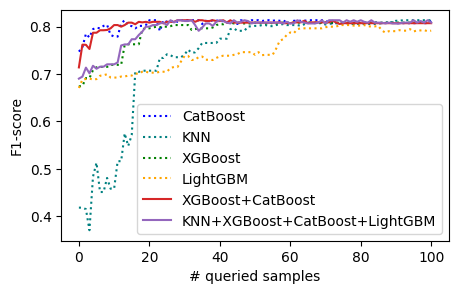

In [3]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

def extract_model_name(file_path):
    # Extracts the model name from a file path
    file_name = os.path.basename(file_path)
    return file_name.split('_')[0]

def group_files_by_conditions(directory, comparison_pairs):
    grouped_files = {}
    for query_strategy, model_name in comparison_pairs: 
    # Groups the files based on their n_initial and k values
        files = glob.glob(os.path.join(directory, query_strategy, f'{model_name}_{split_method}_{n_initial}_initial_{k}_k.csv'))
        key = (query_strategy, model_name)
        if key not in grouped_files:
            grouped_files[key]=files
    
    return grouped_files

def read_metrics(file_paths, metric):
    # Reads the F1 scores from CSV files
    metrics = []
    
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        metrics.append(df[metric].values)  # Assuming F1 Score is in the first column
        # f1_scores.append(df['F1-score'].values)  
    
    return metrics

def read_num_samples(file_path):
    # Reads the number of samples from a CSV file
    df = pd.read_csv(file_path)
    return df['num_samples'].values # Assuming num_samples is in the first column

def plot_metrics(grouped_files, metric):
    # Plots the F1 scores for different models using the number of samples as the x-axis
    plt.figure(figsize=[5,3])
    for key, files in grouped_files.items():
        metrics = read_metrics(files, metric)
        num_samples = read_num_samples(files[0])  # Assuming all files have the same num_samples
        for value in metrics:
            plt.plot(num_samples, value, label=key[1], linewidth=1.5, color=COLOR_MAP[key[1]], linestyle = LINE_MAP[key[0]])

    plt.xlabel('# queried samples')
    plt.ylabel(metric)
    plt.legend(loc='lower right')
    # plt.grid(True)
    print(f'========== Initial:{n_initial}   K:{k} ==========')
    
    figure_file = os.path.join(RESULT_PATH, f'{metric}_qbc_over_uncertainty_{n_initial}_initial_{k}_k.png')
    plt.savefig(figure_file, dpi=300, bbox_inches='tight')
    plt.show()

# Example usage
directory = RESULT_PATH  # Replace with the actual directory path
grouped_files = group_files_by_conditions(directory, comparison_pairs)

plot_metrics(grouped_files, 'F1-score')
# plot_metrics(grouped_files, 'Precision')
# plot_metrics(grouped_files, 'Recall')


In [4]:
grouped_files

{('uncertainty',
  'CatBoost'): ['../results/randomsplit/4903052/uncertainty/CatBoost_random_1000_initial_1_k.csv'],
 ('uncertainty',
  'KNN'): ['../results/randomsplit/4903052/uncertainty/KNN_random_1000_initial_1_k.csv'],
 ('uncertainty',
  'XGBoost'): ['../results/randomsplit/4903052/uncertainty/XGBoost_random_1000_initial_1_k.csv'],
 ('uncertainty',
  'LightGBM'): ['../results/randomsplit/4903052/uncertainty/LightGBM_random_1000_initial_1_k.csv'],
 ('consensus-entropy',
  'XGBoost+CatBoost'): ['../results/randomsplit/4903052/consensus-entropy/XGBoost+CatBoost_random_1000_initial_1_k.csv'],
 ('consensus-entropy',
  'KNN+XGBoost+CatBoost+LightGBM'): ['../results/randomsplit/4903052/consensus-entropy/KNN+XGBoost+CatBoost+LightGBM_random_1000_initial_1_k.csv']}